In [93]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

# Data pre-processing

## Inspecting Data

In [94]:
df = pd.read_csv('weather_data.csv')
df.info()
df.head(24) # to see 1 whole day

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100057 entries, 0 to 100056
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   temperature                100057 non-null  float64
 1   wind_speed                 100057 non-null  float64
 2   mean_sea_level_pressure    100057 non-null  float64
 3   surface_solar_radiation    100057 non-null  float64
 4   surface_thermal_radiation  100057 non-null  float64
 5   total_cloud_cover          100057 non-null  float64
 6   relative_humidity          100057 non-null  float64
dtypes: float64(7)
memory usage: 5.3 MB


temperature  wind_speed  mean_sea_level_pressure  surface_solar_radiation  \
0         18.26        2.60                101046.38                   287.01   
1         18.67        2.91                101037.96                   360.79   
2         18.16        3.26                101017.26                   291.54   
3         18.46        3.17                101022.56                   357.11   
4         18.53        2.95                100940.03                   459.91   
5         18.92        2.62                100885.16                   513.07   
6         19.22        2.87                100825.28                   312.21   
7         19.41        3.01                100801.35                   211.40   
8         19.67        2.72                100817.06                   112.08   
9         20.28        1.94                100834.75                    57.45   
10        18.37        2.98                100747.92                    12.69   
11        18.66        2.97                100776.94                     0.00   
12        17.71        2.67                100777.38                     0.00   
13        17.93        2.23                100784.78                     0.00   
14        17.77        2.59                100821.04                     0.00   
15        17.13        3.63                100796.68                     0.00   
16        16.79        4.05                100778.87                     0.00   
17        16.51        4.32                100803.07                     0.00   
18        15.59        4.44                100881.48                     0.00   
19        15.40        3.89                100955.75                     0.00   
20        15.51        3.64                101028.83                     9.80   
21        15.67        4.20                101087.23                    44.02   
22        16.12        5.11                101141.39                    95.41   
23        16.04        5.37                101198.49                   167.84   

    surface_thermal_radiation  total_cloud_cover  relative_humidity  
0                      408.35               1.00               0.89  
1                      411.02               1.00               0.86  
2                      410.67               1.00               0.87  
3                      410.95               1.00               0.82  
4                      410.00               0.90               0.80  
5                      407.46               0.96               0.79  
6                      411.98               0.94               0.77  
7                      406.76               0.90               0.76  
8                      404.20               0.89               0.74  
9                      401.17               0.89               0.71  
10                     388.98               0.68               0.83  
11                     397.29               0.81               0.82  
12                     395.51               0.95               0.87  
13                     397.81               0.95               0.87  
14                     374.95               0.95               0.90  
15                     386.09               1.00               0.92  
16                     388.44               1.00               0.94  
17                     391.23               1.00               0.94  
18                     396.73               1.00               0.94  
19                     378.62               1.00               0.91  
20                     379.78               1.00               0.91  
21                     379.38               1.00               0.91  
22                     378.74               1.00               0.83  
23                     376.88               1.00               0.81

In [95]:
df.describe()

temperature     wind_speed  mean_sea_level_pressure  \
count  100057.000000  100057.000000            100057.000000   
mean       14.802318       3.909783            101613.132937   
std         5.575031       2.050064               925.846843   
min         0.860000       0.020000             96725.920000   
25%        10.830000       2.300000            101169.940000   
50%        13.920000       3.670000            101703.710000   
75%        18.000000       5.280000            102201.650000   
max        40.360000      13.230000            103397.530000   

       surface_solar_radiation  surface_thermal_radiation  total_cloud_cover  \
count            100057.000000              100057.000000      100057.000000   
mean                182.921098                 324.615891           0.587394   
std                 265.316443                  32.930795           0.356411   
min                   0.000000                 232.150000           0.000000   
25%                   0.000000                 300.510000           0.270000   
50%                   7.220000                 322.900000           0.650000   
75%                 316.230000                 347.150000           0.940000   
max                1112.140000                 458.760000           1.000000   

       relative_humidity  
count      100057.000000  
mean            0.729192  
std             0.158500  
min             0.120000  
25%             0.620000  
50%             0.760000  
75%             0.850000  
max             1.090000

There are 7 columns and 100057 rows. All columns are continuous and numeric. There are no null values in the data frame.

In [96]:
df[df['relative_humidity']>1]

temperature  wind_speed  mean_sea_level_pressure  \
16008        11.93        6.70                101736.07   
27210        13.40        0.45                101310.55   
27232        13.23        0.57                101305.03   
27233        13.18        0.93                101281.83   
27234        12.49        0.75                101271.51   
27235        12.16        0.87                101301.08   
27236        12.46        1.14                101331.64   
27237        13.05        1.17                101365.41   
27282         9.92        4.54                102009.52   
27283         9.43        4.35                101980.19   
27284         9.68        4.11                102007.48   
27401        16.21        2.31                101760.89   
27402        15.26        1.99                101797.30   
27403        15.21        1.78                101812.23   
27404        15.63        1.70                101884.23   
27426        13.99        1.36                101689.50   
27427        14.03        1.40                101707.72   
27428        14.30        1.61                101763.82   
27429        14.63        2.49                101848.59   
27660        20.25        1.20                101195.93   
27661        19.87        1.47                101170.75   
27662        19.88        2.37                101121.29   
27663        19.48        3.83                101112.93   
27664        19.57        5.20                101039.04   
27676        19.18        4.97                101038.64   
27684        14.32        2.54                101325.81   
27685        14.34        3.03                101309.29   
27686        14.42        3.60                101313.49   
27687        13.94        5.16                101276.47   

       surface_solar_radiation  surface_thermal_radiation  total_cloud_cover  \
16008                   505.92                     340.45               0.88   
27210                     0.00                     353.59               0.78   
27232                     0.00                     318.06               0.02   
27233                     0.00                     316.88               0.03   
27234                     0.00                     317.32               0.02   
27235                     0.00                     326.12               0.01   
27236                     2.24                     320.53               0.06   
27237                   100.50                     327.53               0.07   
27282                     0.00                     288.93               0.00   
27283                     0.00                     284.20               0.01   
27284                     1.63                     283.63               0.00   
27401                     0.00                     331.57               0.00   
27402                     0.00                     333.68               0.01   
27403                     0.00                     333.40               0.00   
27404                     0.39                     334.26               0.00   
27426                     0.00                     316.97               0.00   
27427                     0.00                     324.52               0.00   
27428                     0.24                     325.42               0.00   
27429                    79.51                     328.09               0.03   
27660                     0.00                     376.41               0.43   
27661                     0.00                     386.96               0.63   
27662                     0.00                     385.65               0.86   
27663                     0.00                     385.07               1.00   
27664                     0.00                     391.79               1.00   
27676                   276.78                     413.47               0.99   
27684                     0.00                     376.84               1.00   
27685                     0.00                     378.84               1.00

Since almost all of these humidities are recorded in Feb 2013 (and 1 in 2011), we can treat it as an isolated phenomenon and strictly predict relative humidity levels between 0 and 1.

Hence, we replace the relative humidity in these rows with 1.

In [97]:
df['relative_humidity'] = df['relative_humidity'].apply(lambda x: min(x, 1))

To more easily relate the data to real life, in terms of season etc., we insert a date_time column.

In [98]:
# add time column

df_time = df.copy()
df_time['date_time'] = pd.date_range(start='1/1/2010 11:00:00', periods=100057, freq='h', tz='Australia/Sydney')
df_time.head(24)

temperature  wind_speed  mean_sea_level_pressure  surface_solar_radiation  \
0         18.26        2.60                101046.38                   287.01   
1         18.67        2.91                101037.96                   360.79   
2         18.16        3.26                101017.26                   291.54   
3         18.46        3.17                101022.56                   357.11   
4         18.53        2.95                100940.03                   459.91   
5         18.92        2.62                100885.16                   513.07   
6         19.22        2.87                100825.28                   312.21   
7         19.41        3.01                100801.35                   211.40   
8         19.67        2.72                100817.06                   112.08   
9         20.28        1.94                100834.75                    57.45   
10        18.37        2.98                100747.92                    12.69   
11        18.66        2.97                100776.94                     0.00   
12        17.71        2.67                100777.38                     0.00   
13        17.93        2.23                100784.78                     0.00   
14        17.77        2.59                100821.04                     0.00   
15        17.13        3.63                100796.68                     0.00   
16        16.79        4.05                100778.87                     0.00   
17        16.51        4.32                100803.07                     0.00   
18        15.59        4.44                100881.48                     0.00   
19        15.40        3.89                100955.75                     0.00   
20        15.51        3.64                101028.83                     9.80   
21        15.67        4.20                101087.23                    44.02   
22        16.12        5.11                101141.39                    95.41   
23        16.04        5.37                101198.49                   167.84   

    surface_thermal_radiation  total_cloud_cover  relative_humidity  \
0                      408.35               1.00               0.89   
1                      411.02               1.00               0.86   
2                      410.67               1.00               0.87   
3                      410.95               1.00               0.82   
4                      410.00               0.90               0.80   
5                      407.46               0.96               0.79   
6                      411.98               0.94               0.77   
7                      406.76               0.90               0.76   
8                      404.20               0.89               0.74   
9                      401.17               0.89               0.71   
10                     388.98               0.68               0.83   
11                     397.29               0.81               0.82   
12                     395.51               0.95               0.87   
13                     397.81               0.95               0.87   
14                     374.95               0.95               0.90   
15                     386.09               1.00               0.92   
16                     388.44               1.00               0.94   
17                     391.23               1.00               0.94   
18                     396.73               1.00               0.94   
19                     378.62               1.00               0.91   
20                     379.78               1.00               0.91   
21                     379.38               1.00               0.91   
22                     378.74               1.00               0.83   
23                     376.88               1.00               0.81   

                   date_time  
0  2010-01-01 11:00:00+11:00  
1  2010-01-01 12:00:00+11:00  
2  2010-01-01 13:00:00+11:00  
3  2010-01-01 14:00:00+11:00  
4  2010-01-01 15:00:00+11:00  
5  2010-01-01 16

## Plot everything >:)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

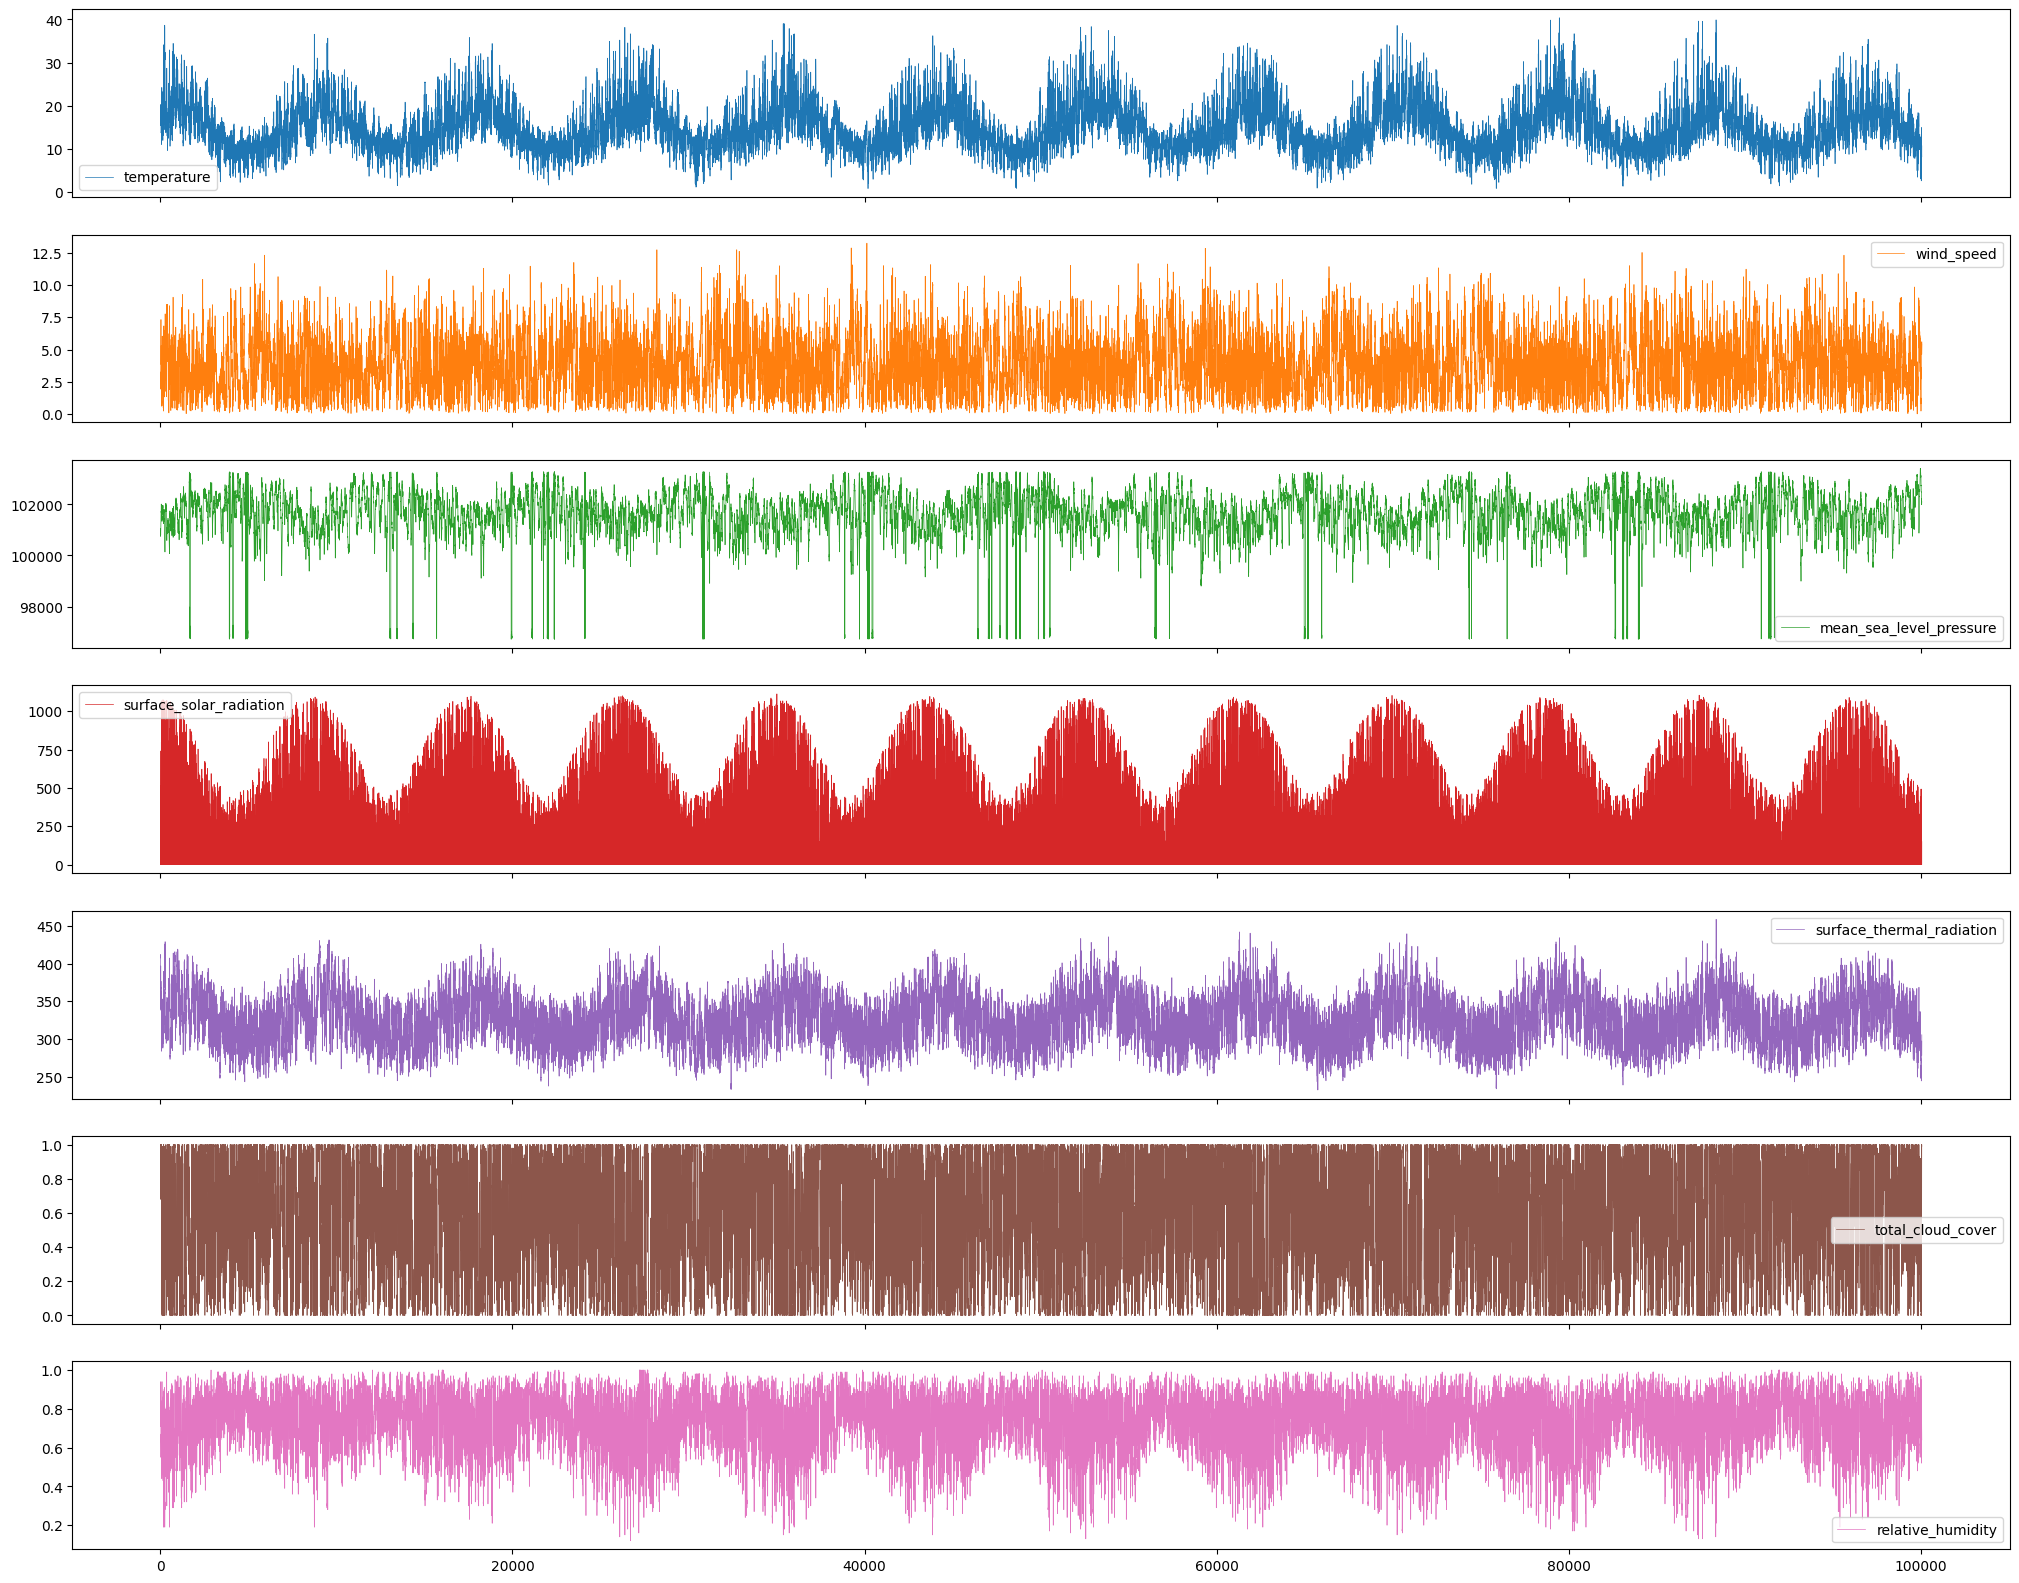

In [99]:
df.plot(subplots=True, figsize=(25,20), linewidth=0.5)

In [100]:
def plot_columns(cols, w):
    df_means = pd.DataFrame()
    for col in cols:
        df_col = df[col].rolling(window=w).mean()
        new_col_name = col + "_mean"
        df_means[new_col_name] = df_col
    df_means.plot(subplots=True, figsize=(25,20))

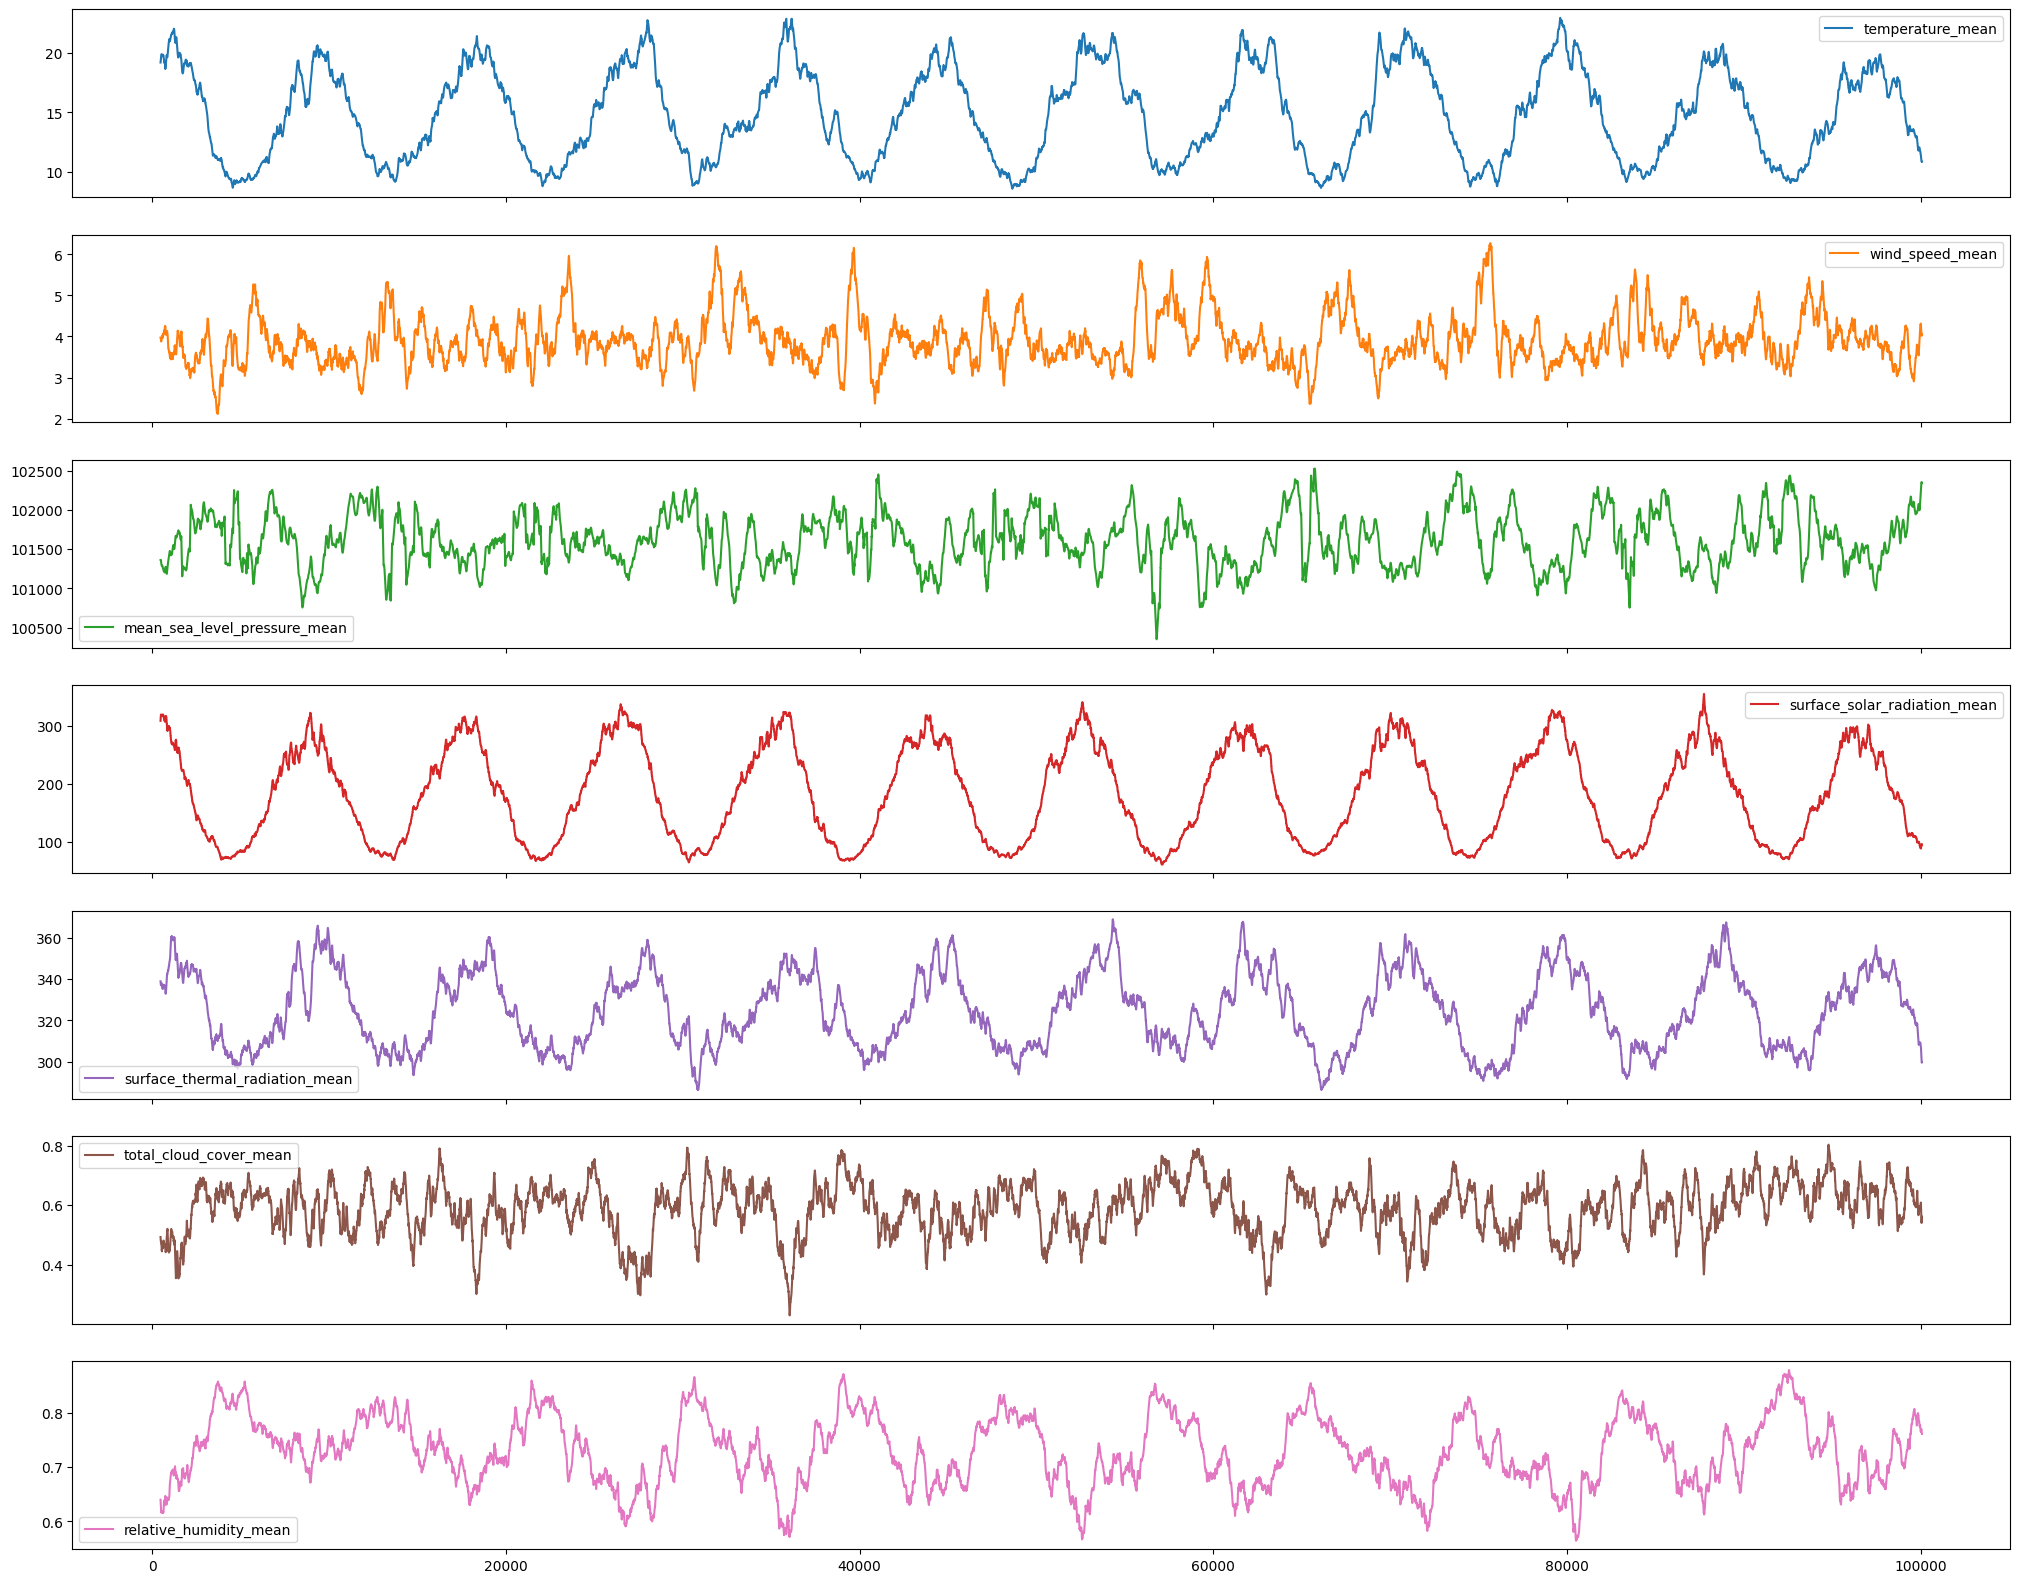

In [101]:
plot_columns(df.columns, 480) 

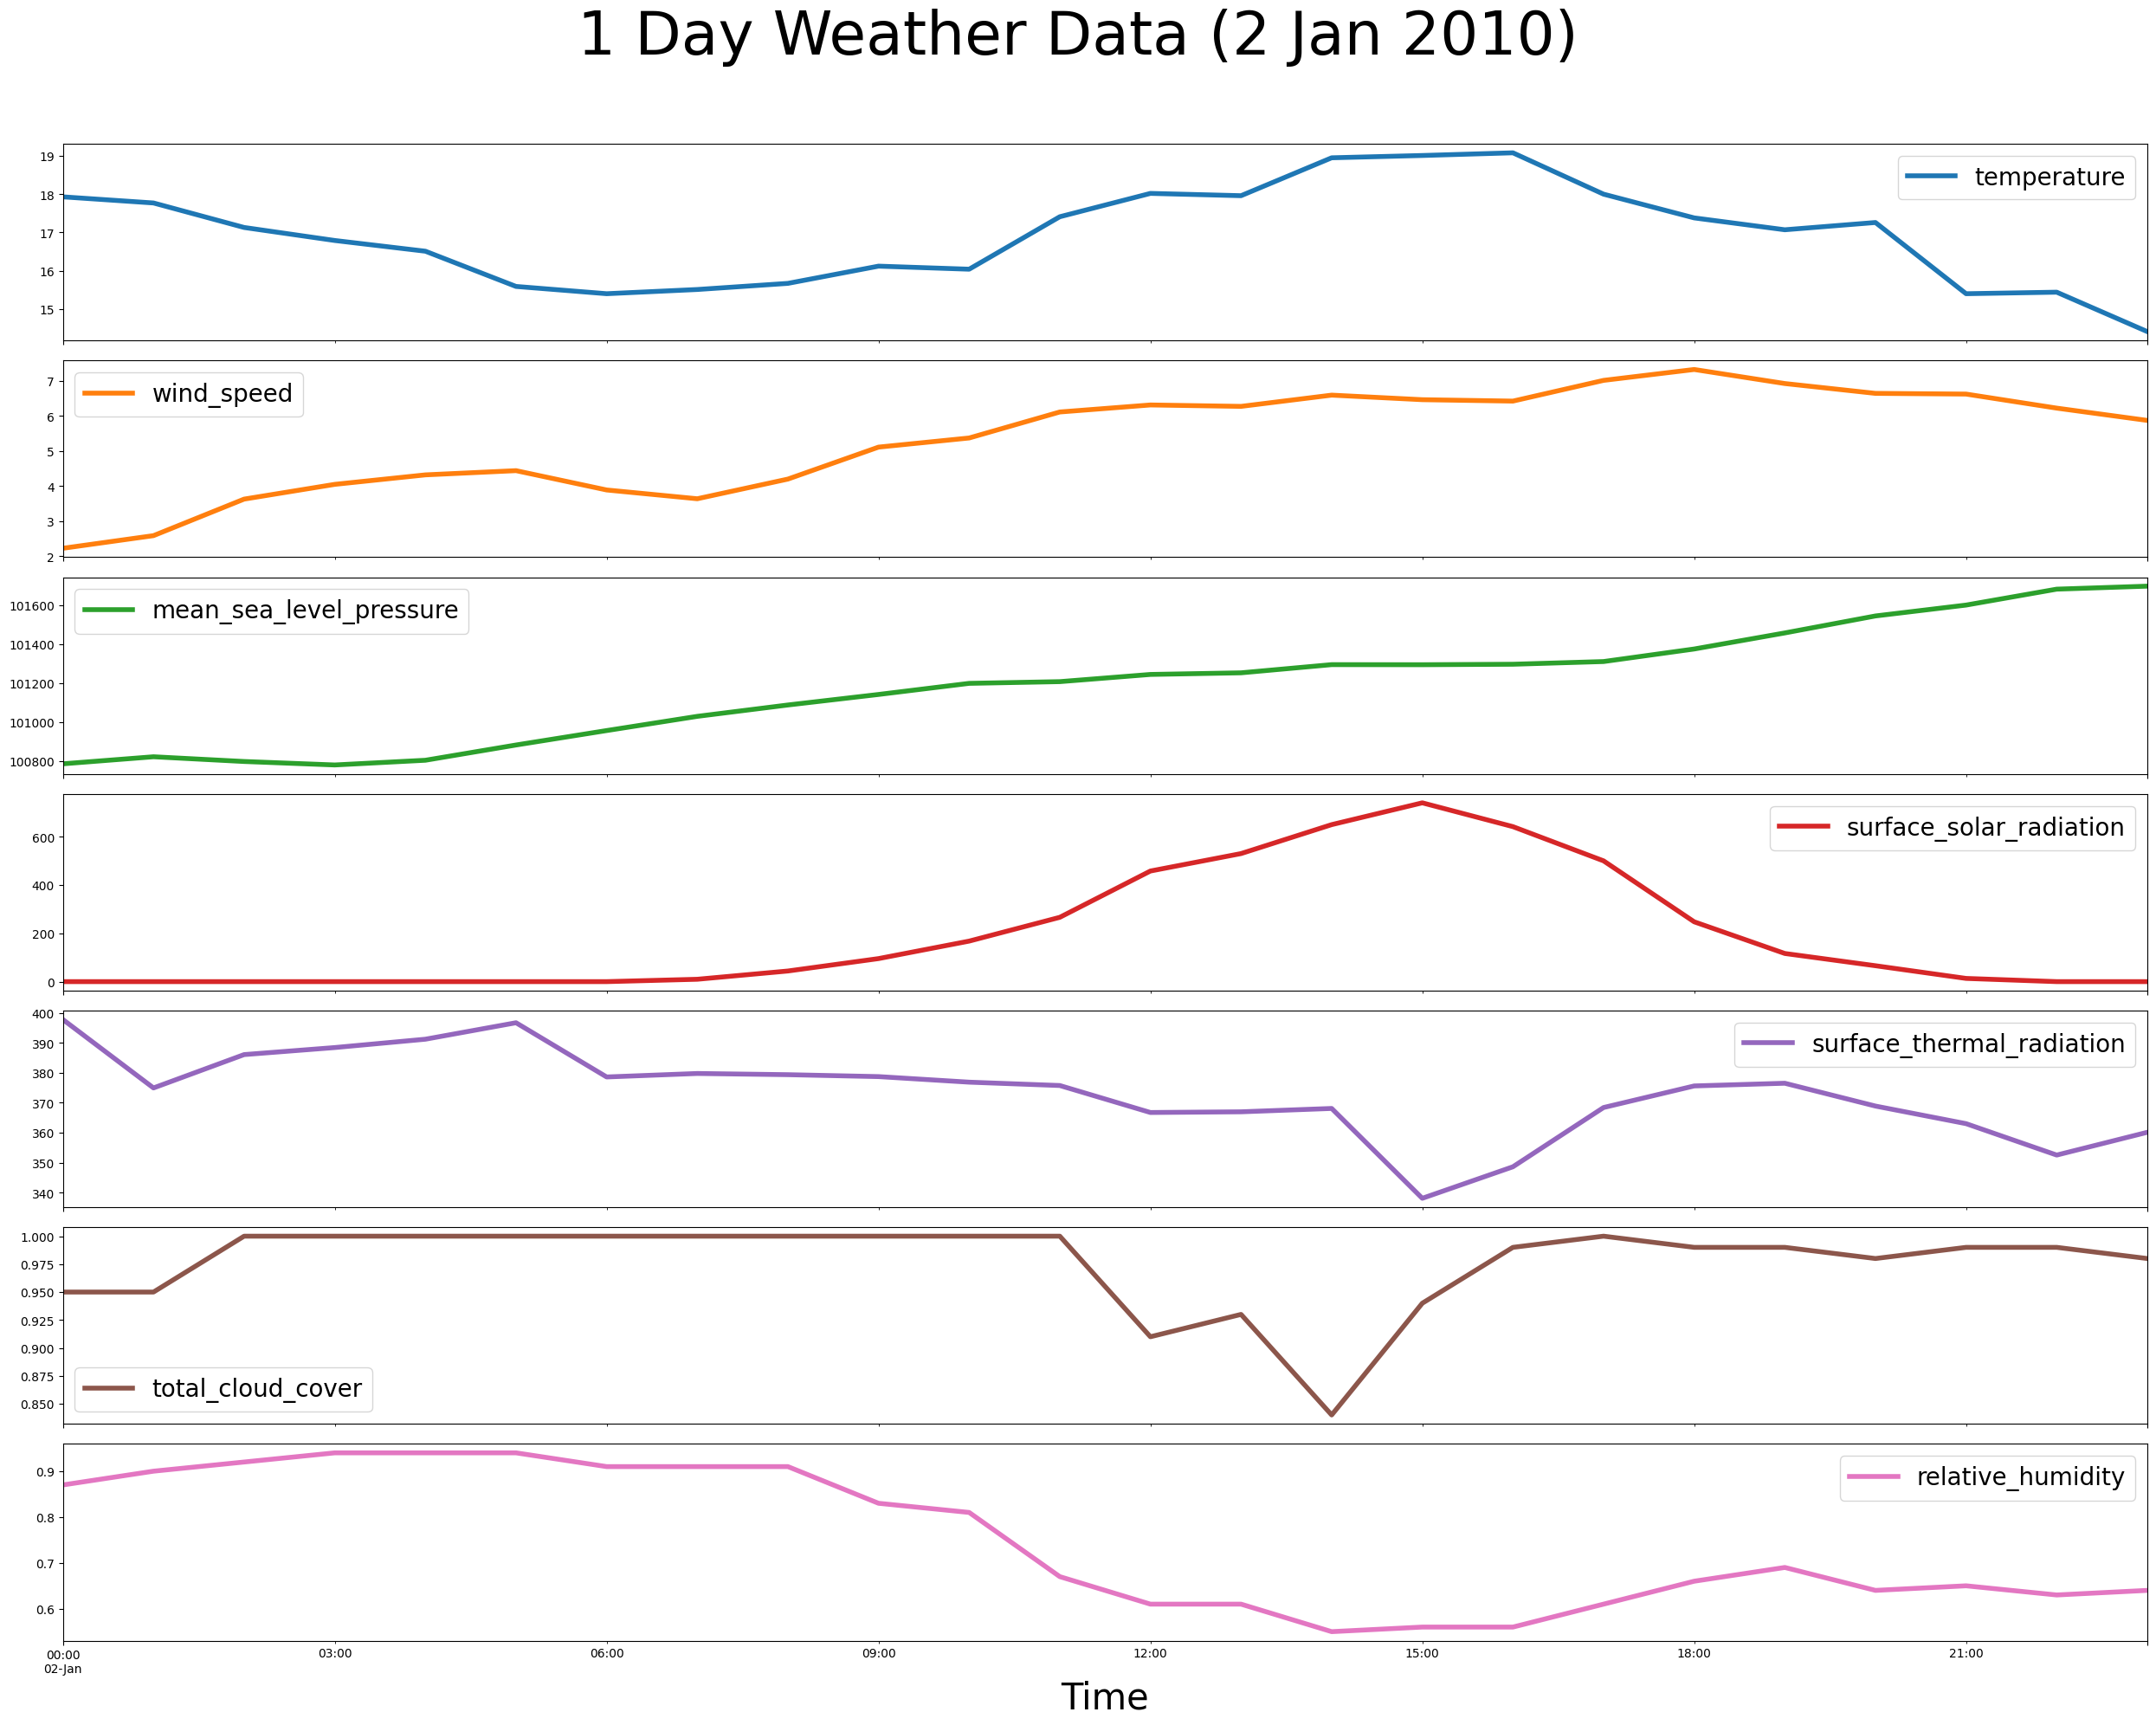

In [102]:
df_time = df.copy()
df_time['date_time'] = pd.date_range(start='1/1/2010 11:00:00', periods=100057, freq='h', tz='Australia/Sydney')

# Plot one day weather data (24 hours of 2 Jan 2010)
one_day = df_time.iloc[13:37, :] 
axes = one_day.plot(
    x='date_time',  
    y=[col for col in one_day.columns if col != 'date_time'], 
    subplots=True, figsize=(25, 20), linewidth=4)
plt.suptitle('1 Day Weather Data (2 Jan 2010)', fontsize=50)
plt.tight_layout(rect=[0, 0, 1, 0.95])

for ax in axes:
    ax.legend(fontsize=20)
    ax.set_xlabel('Time', fontsize = 30)

plt.show()


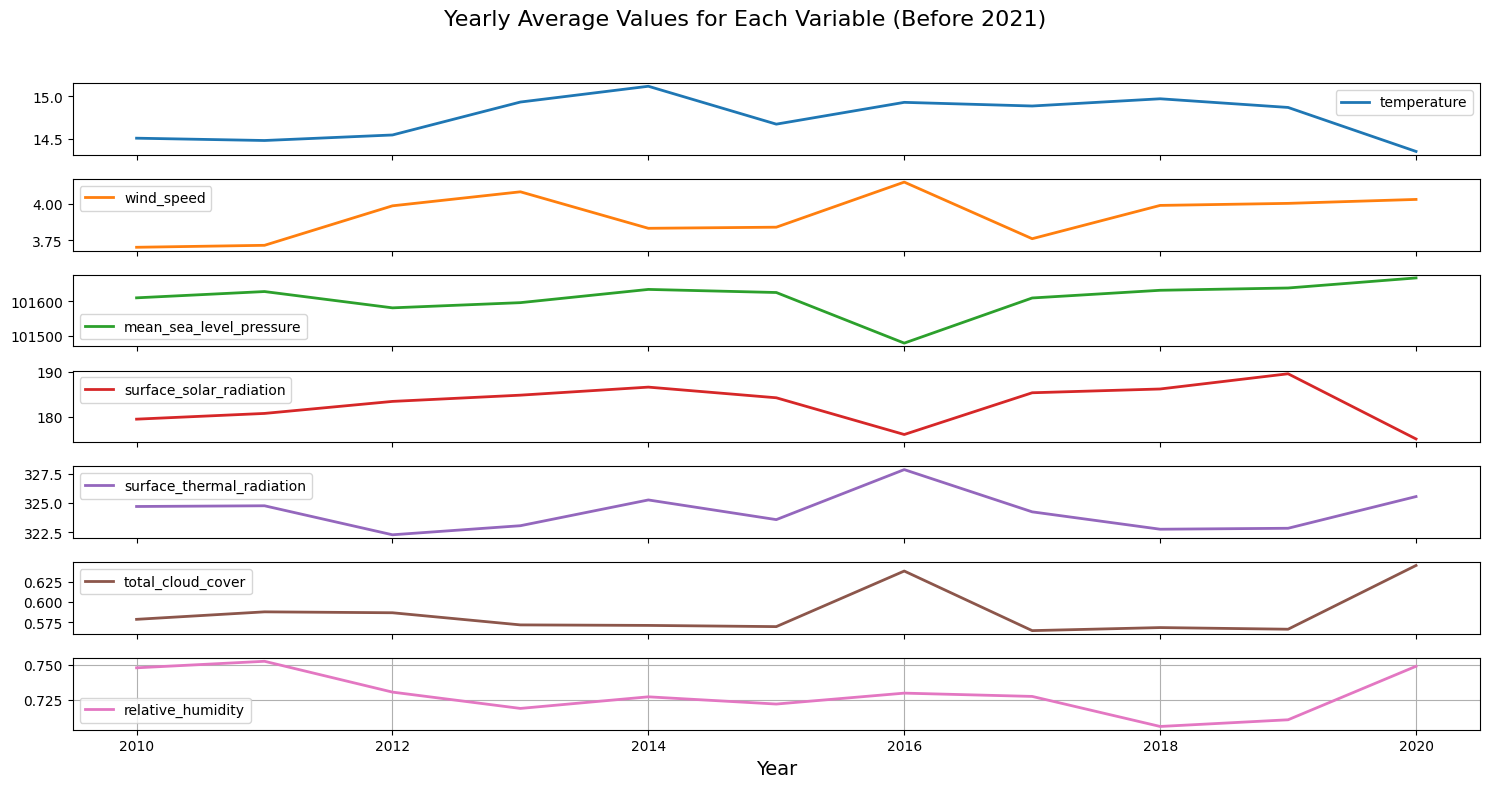

In [103]:
# does global warming have any effect? (probably delete this later)
df_time_dummy = df_time.copy()
df_time_dummy['year'] = df_time_dummy['date_time'].dt.year
# Filter out rows from 2021 onwards since it is incomplete
df_time_dummy = df_time_dummy[df_time_dummy['year'] < 2021]

# Group by year and calculate the mean for each variable
yearly_avg = df_time_dummy.groupby('year').mean()
yearly_avg = yearly_avg.drop(columns=['date_time'])

# Plot the yearly averages
yearly_avg.plot(subplots=True, figsize=(15, 8), linewidth=2)
plt.suptitle('Yearly Average Values for Each Variable (Before 2021)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.grid(True)
plt.show()

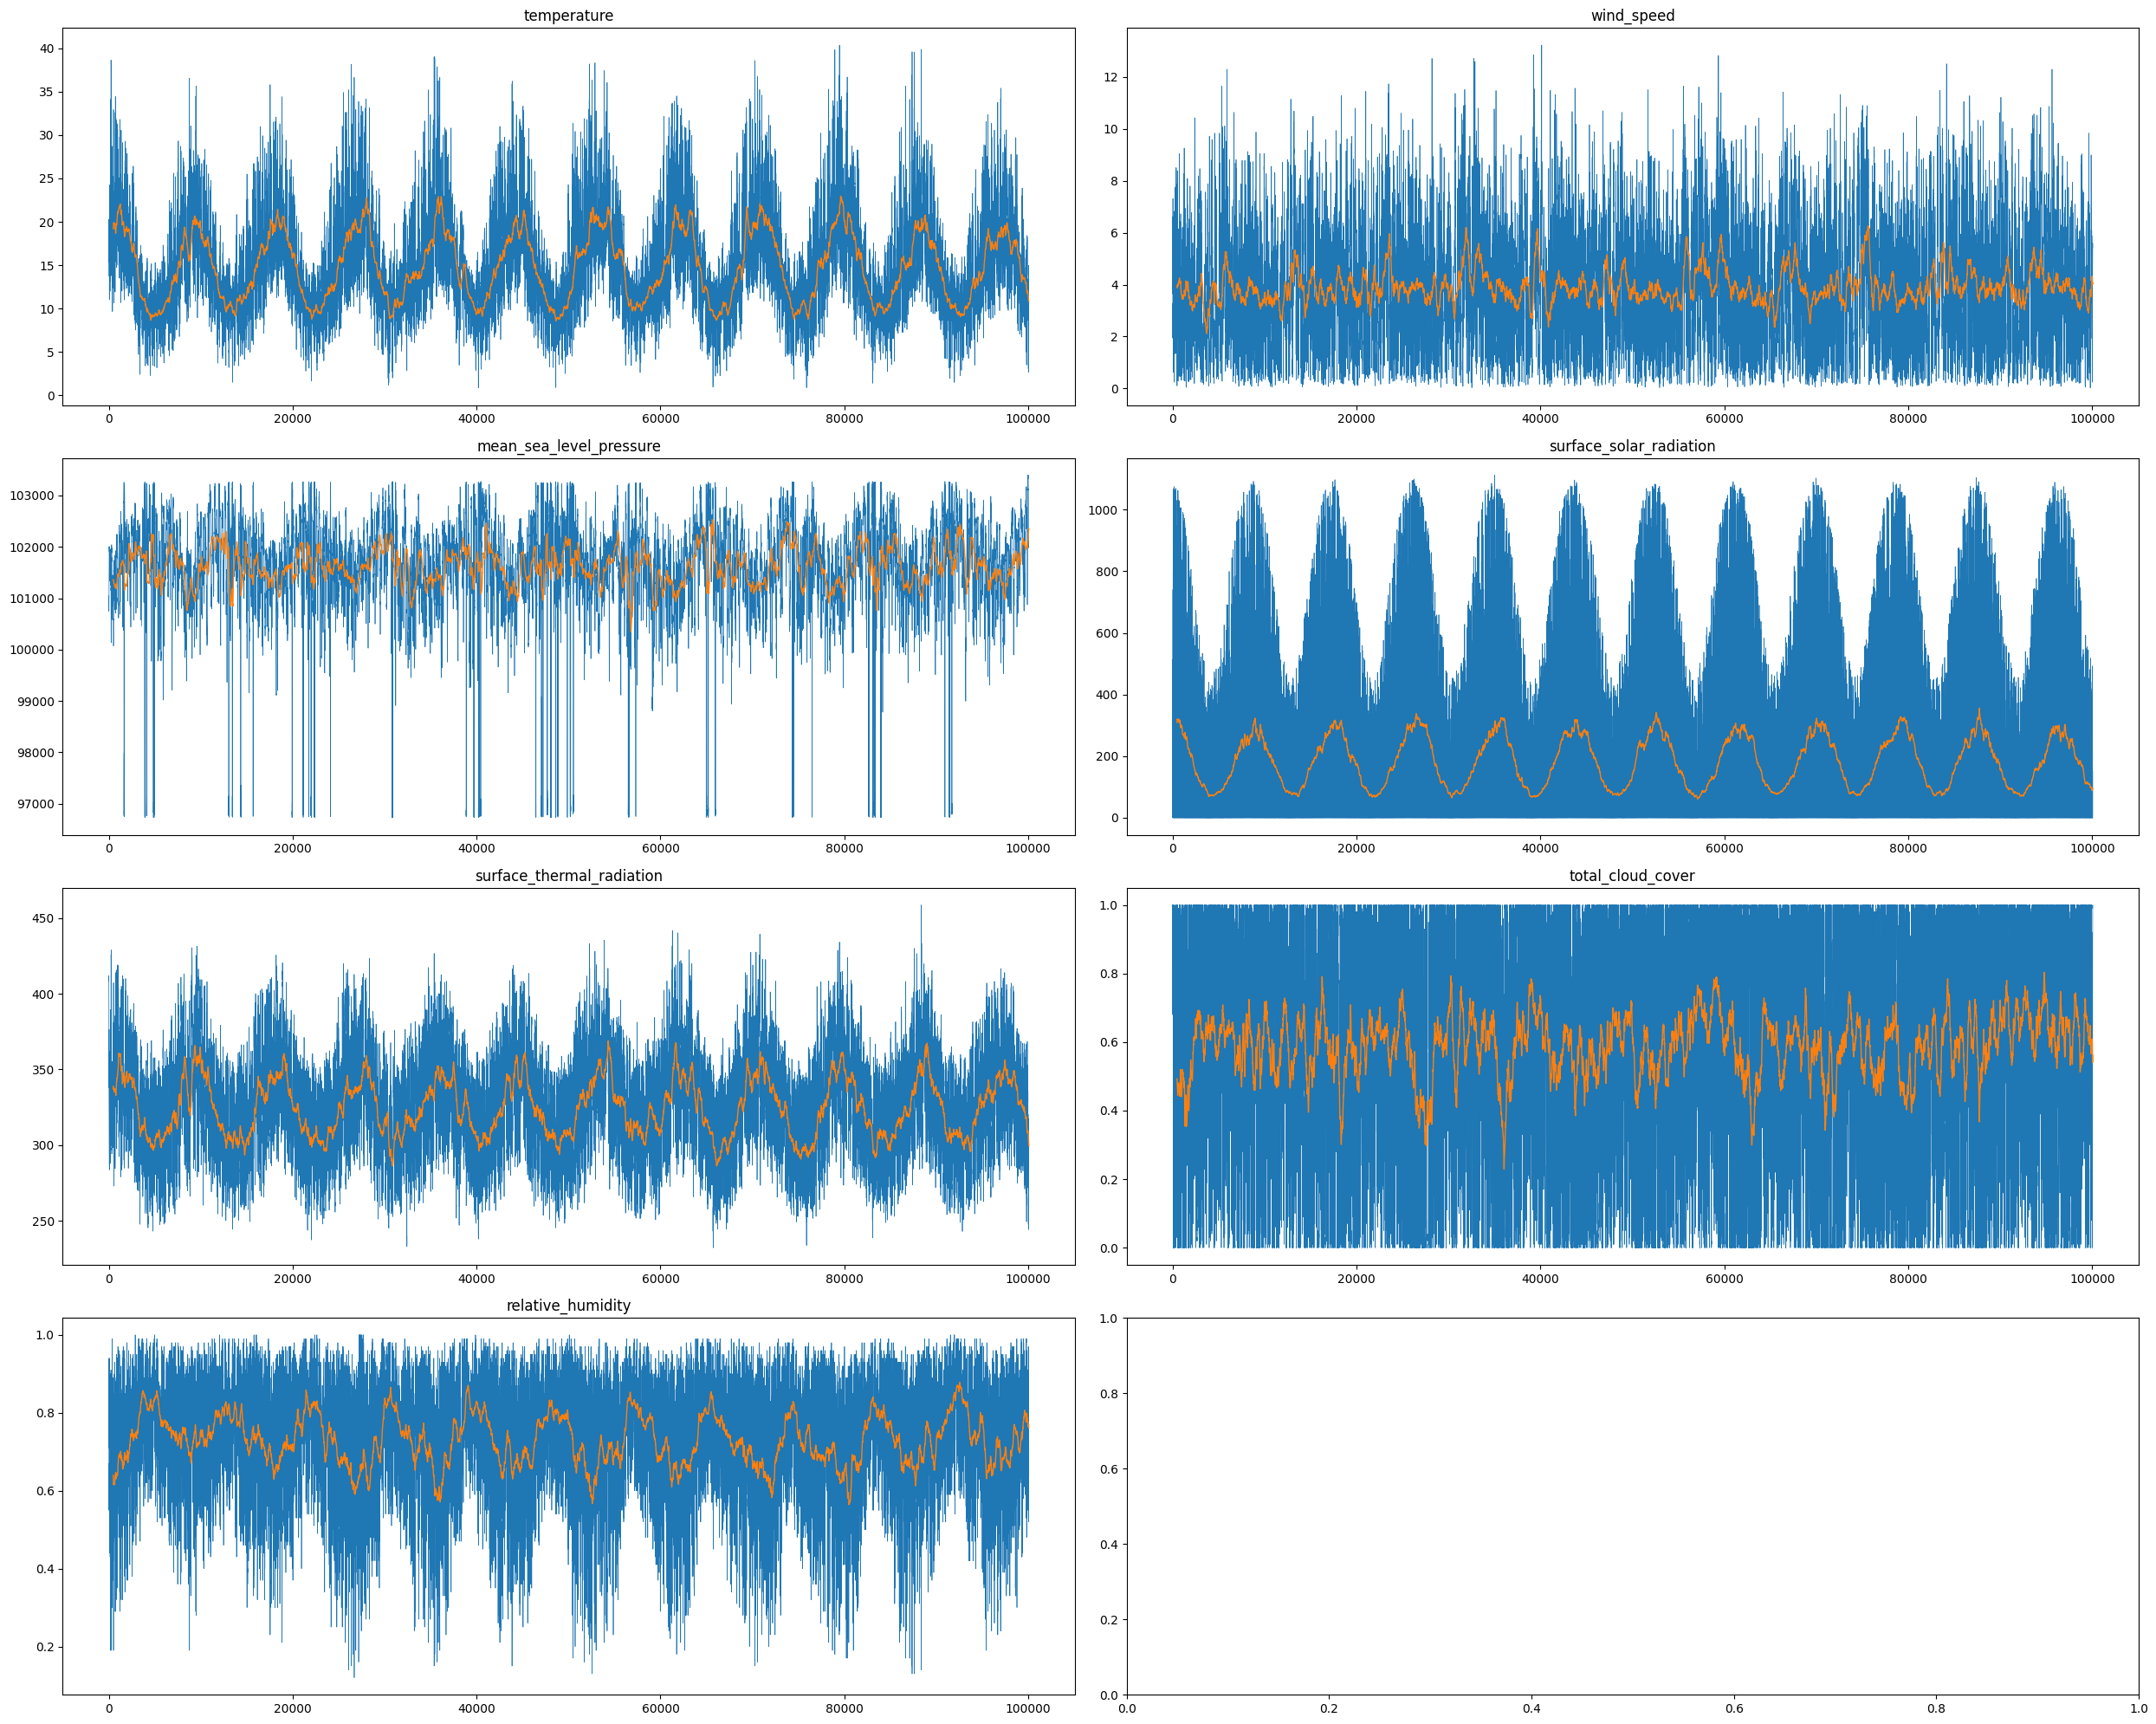

In [104]:
def plot_columns_together(cols, w):
    df_means = pd.DataFrame()
    figure, axis = plt.subplots(4, 2, figsize=(25, 20))
    i = 0
    for col in cols:
        df_col = df[col].rolling(window=w).mean()
        new_col_name = col + "_mean"
        df_means[new_col_name] = df_col

        row_idx = i // 2
        col_idx = i % 2
        ax = axis[row_idx, col_idx]
        ax.plot(df[col], label=col, linewidth=0.5)
        ax.plot(df_col, label=new_col_name, linewidth=1)
        ax.set_title(col)
        i += 1
    figure.tight_layout()
plot_columns_together(df.columns, 480)

array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'wind_speed'}>,
        <Axes: title={'center': 'mean_sea_level_pressure'}>],
       [<Axes: title={'center': 'surface_solar_radiation'}>,
        <Axes: title={'center': 'surface_thermal_radiation'}>,
        <Axes: title={'center': 'total_cloud_cover'}>],
       [<Axes: title={'center': 'relative_humidity'}>, <Axes: >,
        <Axes: >]], dtype=object)

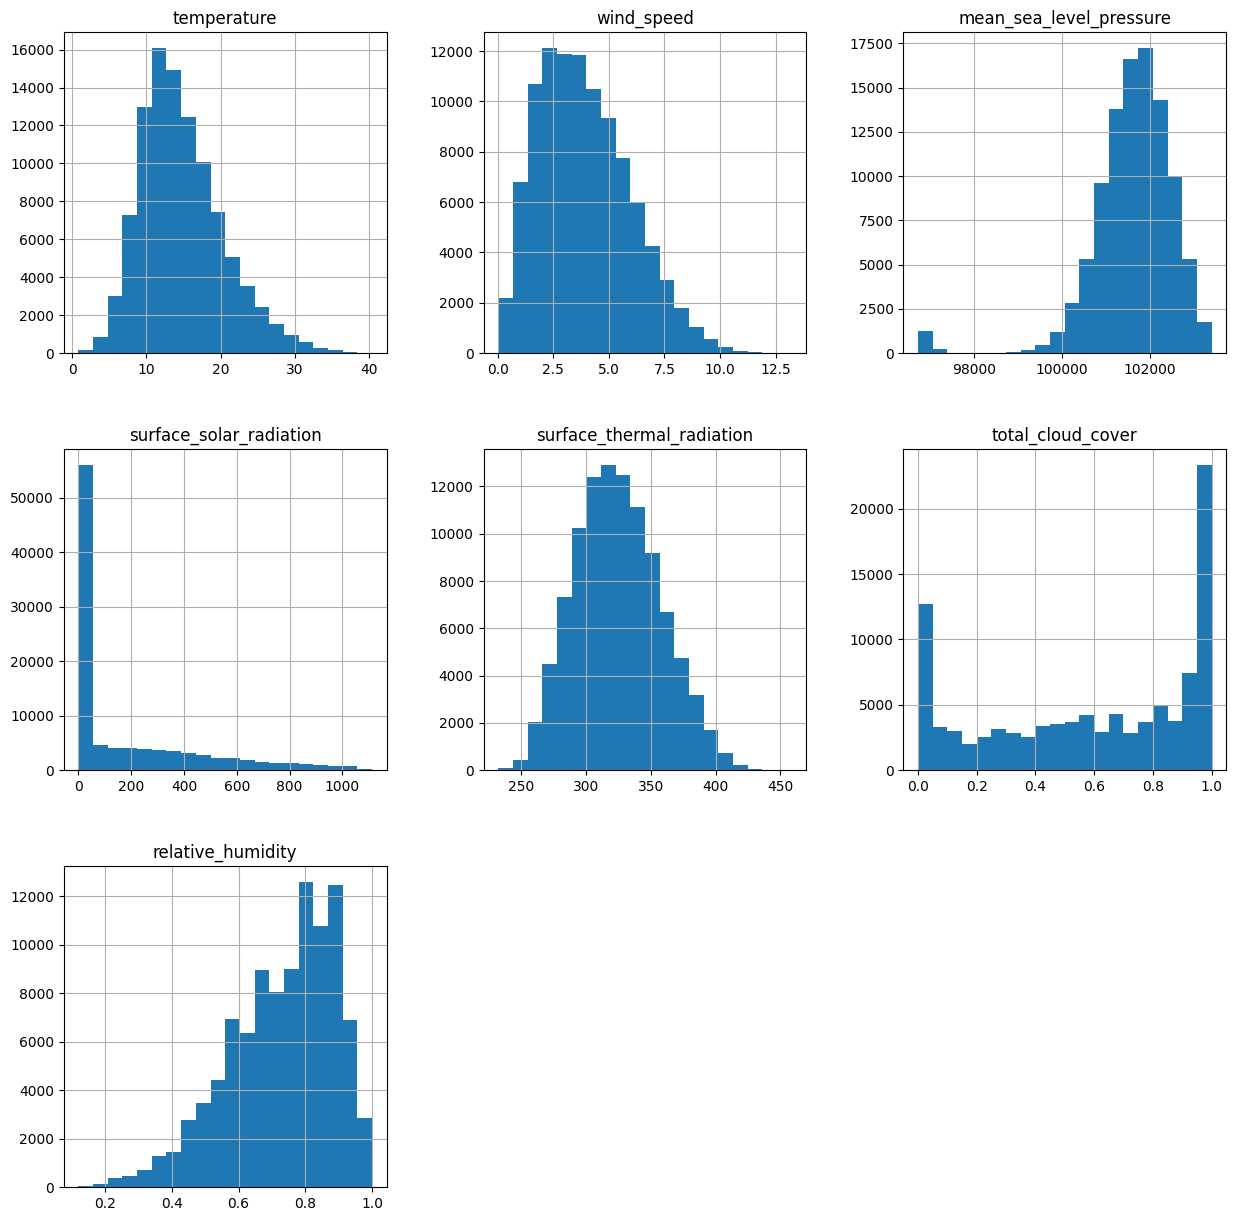

In [105]:
df.hist(bins=20, figsize=(15,15))

Based on the distributions of the variables obtained, we perform standardisation on the following variables, which have roughly normal distributions:
1. temperature
2. wind_speed
3. surface_thermal_radiation
4. relative humidity

However, there are 3 variables with unique distributions that we need to deal with:
1. mean_sea_level_pressure: presence of a small group of anomalies
2. surface_solar_radiation: abundance of extreme values on the left
3. total_cloud_cover: abundance of extreme values on both the right and the left

### Mean sea level pressure

We observe from the histograms above that mean sea level is sometimes much lower than expected. We want to see if there are any patterns in these observations.

In [106]:
special_df = df_time[df_time['mean_sea_level_pressure'] < 98050]
special_df = special_df.copy()
special_df.head()

temperature  wind_speed  mean_sea_level_pressure  \
1652        12.24        2.52                 96764.30   
1653        12.49        2.96                 96840.68   
1654        14.55        2.74                 96876.75   
1655        14.95        3.58                 96908.22   
1656        17.31        4.22                 96950.93   

      surface_solar_radiation  surface_thermal_radiation  total_cloud_cover  \
1652                     0.00                     299.01               0.08   
1653                    28.87                     290.09               0.07   
1654                   198.61                     294.88               0.02   
1655                   423.48                     303.21               0.03   
1656                   591.62                     304.39               0.13   

      relative_humidity                 date_time  
1652               0.81 2010-03-11 07:00:00+11:00  
1653               0.82 2010-03-11 08:00:00+11:00  
1654               0.76 2010-03-11 09:00:00+11:00  
1655               0.74 2010-03-11 10:00:00+11:00  
1656               0.60 2010-03-11 11:00:00+11:00

In [107]:
special_df['mean_sea_level_pressure'].sort_values()

30821    96725.92
48101    96727.49
83953    96728.25
22382    96729.89
83083    96729.90
           ...   
30846    97959.56
15699    97966.15
1661     97978.53
1662     97984.67
50234    98004.63
Name: mean_sea_level_pressure, Length: 1469, dtype: float64

There are a few possible causes of these low pressures:
1. Tropical storms
- 10 Mar 2010: March 2010 Victoria Storms (https://en.wikipedia.org/wiki/March_2010_Victoria_storms#:~:text=The%202010%20Victorian%20storms%20were,winds%20to%20the%20state's%20capital.)
2. Mid-latitude cyclones
3. Deep low-pressure systems

A category 5 hurricane can have pressures as low as 88-95 kPa. So it's probably just a not-so-bad bad weather.

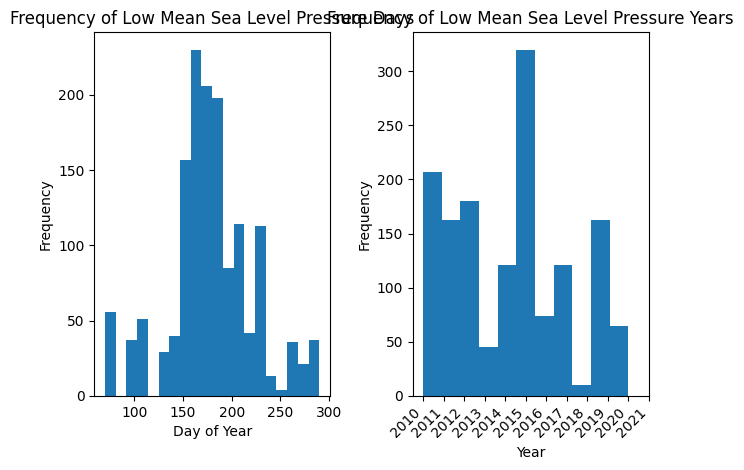

In [108]:
special_df['date'] = special_df['date_time'].apply(lambda x: x.date)

fig1, (ax1, ax2) = plt.subplots(1, 2)

special_df['day_of_year'] = special_df['date_time'].apply(lambda x: x.dayofyear)
ax1.hist(special_df['day_of_year'], bins=20)
ax1.set_xlabel("Day of Year")
ax1.set_ylabel("Frequency")
ax1.set_title("Frequency of Low Mean Sea Level Pressure Days")

special_df['year'] = special_df['date_time'].apply(lambda x: x.year)
ax2.hist(special_df['year'], bins=11)
ax2.set_xticks(range(2010, 2022))
ax2.set_xticklabels(range(2010, 2022))
plt.xticks(rotation=45, ha="right")
ax2.set_xlabel("Year")
ax2.set_ylabel("Frequency")
ax2.set_title("Frequency of Low Mean Sea Level Pressure Years")

fig1.tight_layout()

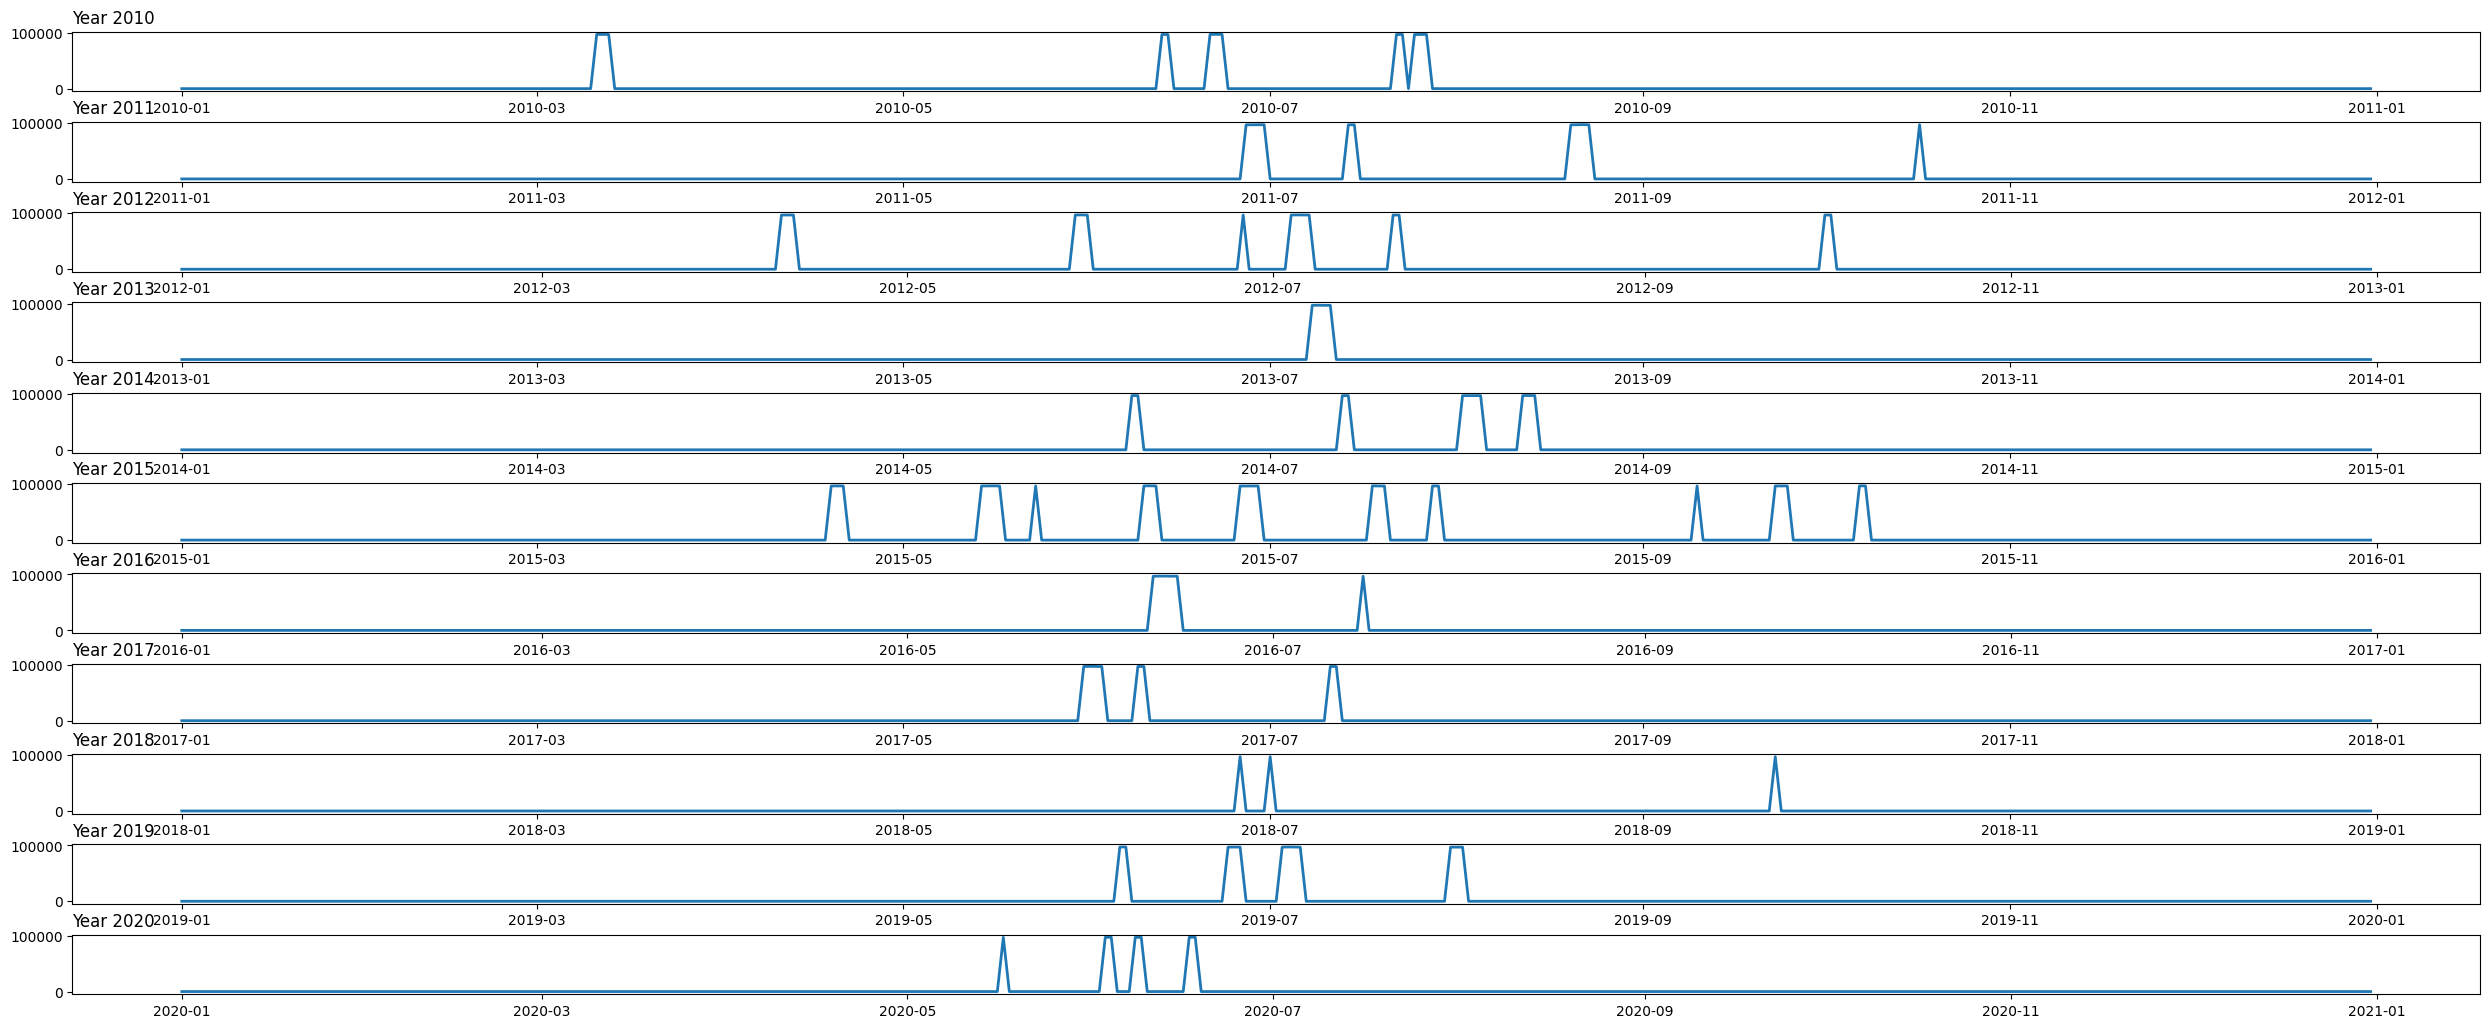

In [109]:
fig_2, ax_2 = plt.subplots(11, 1, figsize=(25, 20))
for i in range(11):
    year = 2010 + i
    to_plot = pd.DataFrame({'dates': pd.date_range(start=f"{year}-01-01", end=f"{year}-12-31").date})
    in_or_not = to_plot.dates.isin(special_df['date'])
    v = np.zeros(len(to_plot))
    for j in range(len(to_plot)):
        if in_or_not[j]:
            v[j] = special_df[special_df['date'] == to_plot.dates[j]]['mean_sea_level_pressure'].mean()
    axis = ax_2[i]
    axis.plot(to_plot['dates'], v, label="Mean Sea Level Pressure", linewidth=2)
    axis.set_title(f"Year {year}", loc='left')

fig_2.tight_layout()
plt.subplots_adjust(bottom=0.5)
plt.show()

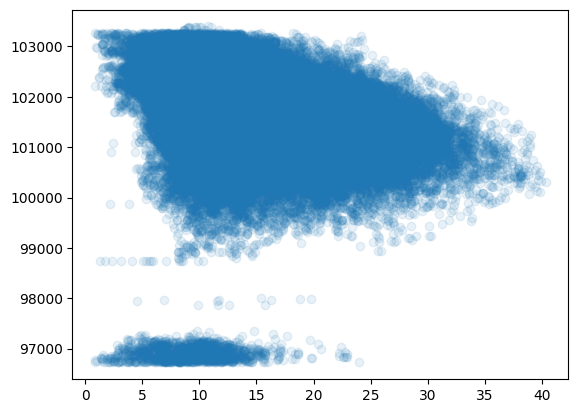

In [110]:
plt.plot(df['temperature'], df['mean_sea_level_pressure'], 'o', alpha=0.1)

Text(0.5, 1.0, 'Mean Sea Level Pressure vs Relative Humidity')

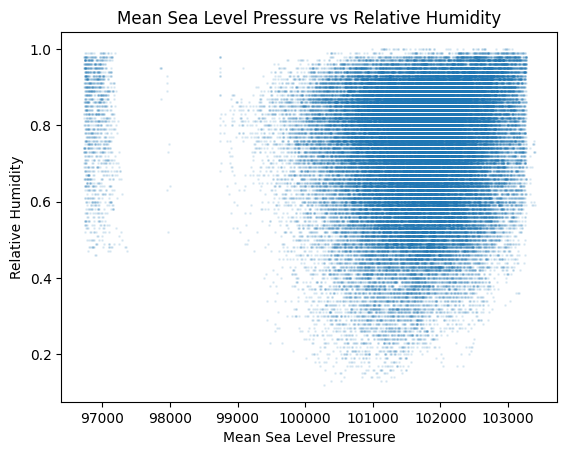

In [111]:
plt.plot(df['mean_sea_level_pressure'][:-5], df['relative_humidity'][5:], 'o', alpha=0.1, markersize=1)
plt.xlabel('Mean Sea Level Pressure')
plt.ylabel('Relative Humidity')
plt.title('Mean Sea Level Pressure vs Relative Humidity')

Low mean sea level pressures tend to be occur more during the middle of the year. This seems to occur quite consistently over the years, except it was very infrequent in 2015 and 2019, and  much higher in 2016.

We can create a dummy variable to mark out these special datapoints.

In [ ]:
temp_2 = (df['mean_sea_level_pressure'] < 98000).astype(int).values
df['low_p_dummy'] = temp_2
df_time['low_p_dummy'] = temp_2

### Surface solar radiation

Surface solar radiation is 0 at night (for example, on 1 Jan, it is 0 from 10pm to 7am). We create a day-night dummy to distinguish these 2 timings as there may be different trends between them.

In [113]:
temp_3 = (df['surface_solar_radiation'] > 0).astype(int)
df['day_night_dummy'] = temp_3
df_time['day_night_dummy'] = temp_3

### Total cloud cover

Since the extreme values are expected and not that irregular, we will keep them for now.

## Data Cleaning

In [114]:
from sklearn.preprocessing import StandardScaler

df_final = df_time.copy()
scaler = StandardScaler()
df_final['temperature'] = scaler.fit_transform(df_time[['temperature']])
df_final['wind_speed'] = scaler.fit_transform(df_time[['wind_speed']])
df_final['mean_sea_level_pressure'] = scaler.fit_transform(df_time[['mean_sea_level_pressure']])
df_final['surface_solar_radiation'] = df_time[['surface_solar_radiation']] / 1000
df_final['surface_thermal_radiation'] = scaler.fit_transform(df_time[['surface_thermal_radiation']])

In [115]:
df_final.head()

temperature  wind_speed  mean_sea_level_pressure  surface_solar_radiation  \
0     0.620212   -0.638901                -0.612149                  0.28701   
1     0.693754   -0.487686                -0.621243                  0.36079   
2     0.602274   -0.316959                -0.643601                  0.29154   
3     0.656086   -0.360860                -0.637876                  0.35711   
4     0.668642   -0.468174                -0.727017                  0.45991   

   surface_thermal_radiation  total_cloud_cover  relative_humidity  \
0                   2.542742                1.0               0.89   
1                   2.623822                1.0               0.86   
2                   2.613193                1.0               0.87   
3                   2.621696                1.0               0.82   
4                   2.592848                0.9               0.80   

                  date_time  low_p_dummy  day_night_dummy  
0 2010-01-01 11:00:00+11:00            0                1  
1 2010-01-01 12:00:00+11:00            0                1  
2 2010-01-01 13:00:00+11:00            0                1  
3 2010-01-01 14:00:00+11:00            0                1  
4 2010-01-01 15:00:00+11:00            0                1

In [116]:
df_final.describe()

temperature    wind_speed  mean_sea_level_pressure  \
count  1.000570e+05  1.000570e+05             1.000570e+05   
mean   4.113119e-16  1.443000e-16             4.628963e-15   
std    1.000005e+00  1.000005e+00             1.000005e+00   
min   -2.500863e+00 -1.897405e+00            -5.278667e+00   
25%   -7.125229e-01 -7.852391e-01            -4.786916e-01   
50%   -1.582632e-01 -1.169640e-01             9.783207e-02   
75%    5.735749e-01  6.683812e-01             6.356559e-01   
max    4.584335e+00  4.546328e+00             1.927323e+00   

       surface_solar_radiation  surface_thermal_radiation  total_cloud_cover  \
count            100057.000000               1.000570e+05      100057.000000   
mean                  0.182921              -1.023167e-15           0.587394   
std                   0.265316               1.000005e+00           0.356411   
min                   0.000000              -2.807899e+00           0.000000   
25%                   0.000000              -7.320203e-01           0.270000   
50%                   0.007220              -5.210623e-02           0.650000   
75%                   0.316230               6.842902e-01           0.940000   
max                   1.112140               4.073536e+00           1.000000   

       relative_humidity    low_p_dummy  day_night_dummy  
count      100057.000000  100057.000000    100057.000000  
mean            0.729183       0.014672         0.541761  
std             0.158483       0.120235         0.498255  
min             0.120000       0.000000         0.000000  
25%             0.620000       0.000000         0.000000  
50%             0.760000       0.000000         1.000000  
75%             0.850000       0.000000         1.000000  
max             1.000000       1.000000         1.000000

# Jennifer's LSTM

Based on [this implementation](https://www.digitalocean.com/community/tutorials/weather-forecast-using-ltsm-networks).
I feel like the train-test split it super sus but I don't even really know how the functions work so...

In [ ]:
from tensorflow import keras

In [ ]:
def train_test_data(data, lag, prediction_lag, sampling_rate):

    training_size = int(0.8 * data.shape[0])  
    train_data = data.loc[0 : training_size - 1]
    val_data = data.loc[training_size:]
    sequence_length = int(lag / sampling_rate)

    # training dataset
    start = lag + prediction_lag
    end = start + training_size

    x_train = train_data.drop(columns=['date_time', 'relative_humidity']).values
    y_train = data.iloc[start:end][['relative_humidity']].values
    
    # validation dataset
    val_start = training_size + start
    val_end = len(val_data)

    val_start = training_size + start
    val_end = len(val_data) - start

    x_val = val_data.drop(columns=['date_time', 'relative_humidity']).iloc[:val_end].values
    y_val = data.iloc[val_start:][['relative_humidity']].values

    return x_train, y_train, x_val, y_val, sequence_length


In [ ]:
def get_datasets(data, lag, prediction_lag, sampling_rate, batch_size):

    x_train, y_train, x_val, y_val, sequence_length = train_test_data(data, lag, prediction_lag, sampling_rate)

    dataset_train = keras.preprocessing.timeseries_dataset_from_array(
        data = x_train,
        targets = y_train,
        sequence_length = sequence_length,
        sampling_rate = sampling_rate,
        batch_size = batch_size,
    )

    # validation dataset

    dataset_val = keras.preprocessing.timeseries_dataset_from_array(
        data = x_val,
        targets = y_val,
        sequence_length = sequence_length,
        sampling_rate = sampling_rate,
        batch_size = batch_size,
    )

    return dataset_train, dataset_val, sequence_length

In [ ]:
def train_LSTM_model(data, lag, prediction_lag, sampling_rate, batch_size, neurons_per_layer):
    
    dataset_train, dataset_val, sequence_length = get_datasets(data, lag, prediction_lag, sampling_rate, batch_size)

    for batch in dataset_train.take(1):
        inputs, targets = batch
    
    inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
    lstm_out = keras.layers.LSTM(neurons_per_layer)(inputs)
    lstm_out = keras.layers.LSTM(neurons_per_layer)(inputs)
    outputs = keras.layers.Dense(1)(lstm_out)

    model = keras.Model(name="Weather_forcaster",inputs=inputs, outputs=outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
    model.summary()

    return dataset_train, dataset_val, model

In [ ]:
np.random.seed(1244)

In [ ]:
x_train, y_train, x_val, y_val, sequence_length = train_test_data(df_final, 72, 1, 1) # lag = 72, prediction_lag = 1, sampling_rate = 1
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(80045, 8) (80045, 1) (19939, 8) (19939, 1)


In [ ]:
model = None
dataset_train, dataset_val, model = train_LSTM_model(df_final, 72, 1, 1, 64, 32)

2025-03-24 00:30:45.938317: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Model: "Weather_forcaster"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 72, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,281 (20.63 KB)

 Trainable params: 5,281 (20.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    dataset_train,
    epochs = 10,
    validation_data = dataset_val
)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0284 - val_loss: 0.0112
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0058 - val_loss: 0.0094
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0053 - val_loss: 0.0085
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.0051 - val_loss: 0.0081
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0049 - val_loss: 0.0079
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0048 - val_loss: 0.0080
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0047 - val_loss: 0.0082
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0046 - val_loss: 0.0085
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0045 - val_loss: 0.0087
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0044 - val_loss: 0.0089


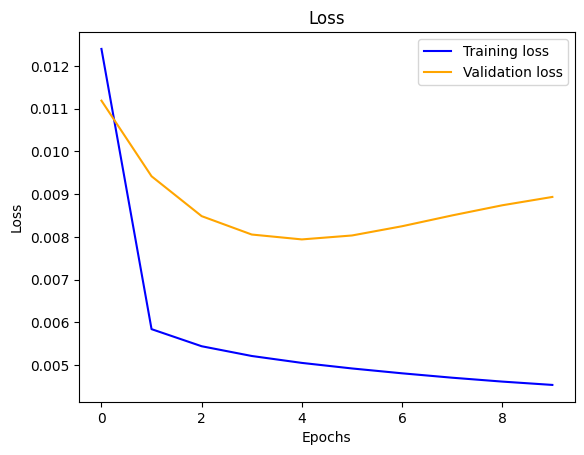

In [ ]:
loss = history.history["loss"]
vol_loss = history.history["val_loss"]
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, label="Training loss", color="blue")
plt.plot(epochs, vol_loss, label="Validation loss", color="orange")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
fitted_train = model.predict(dataset_train)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


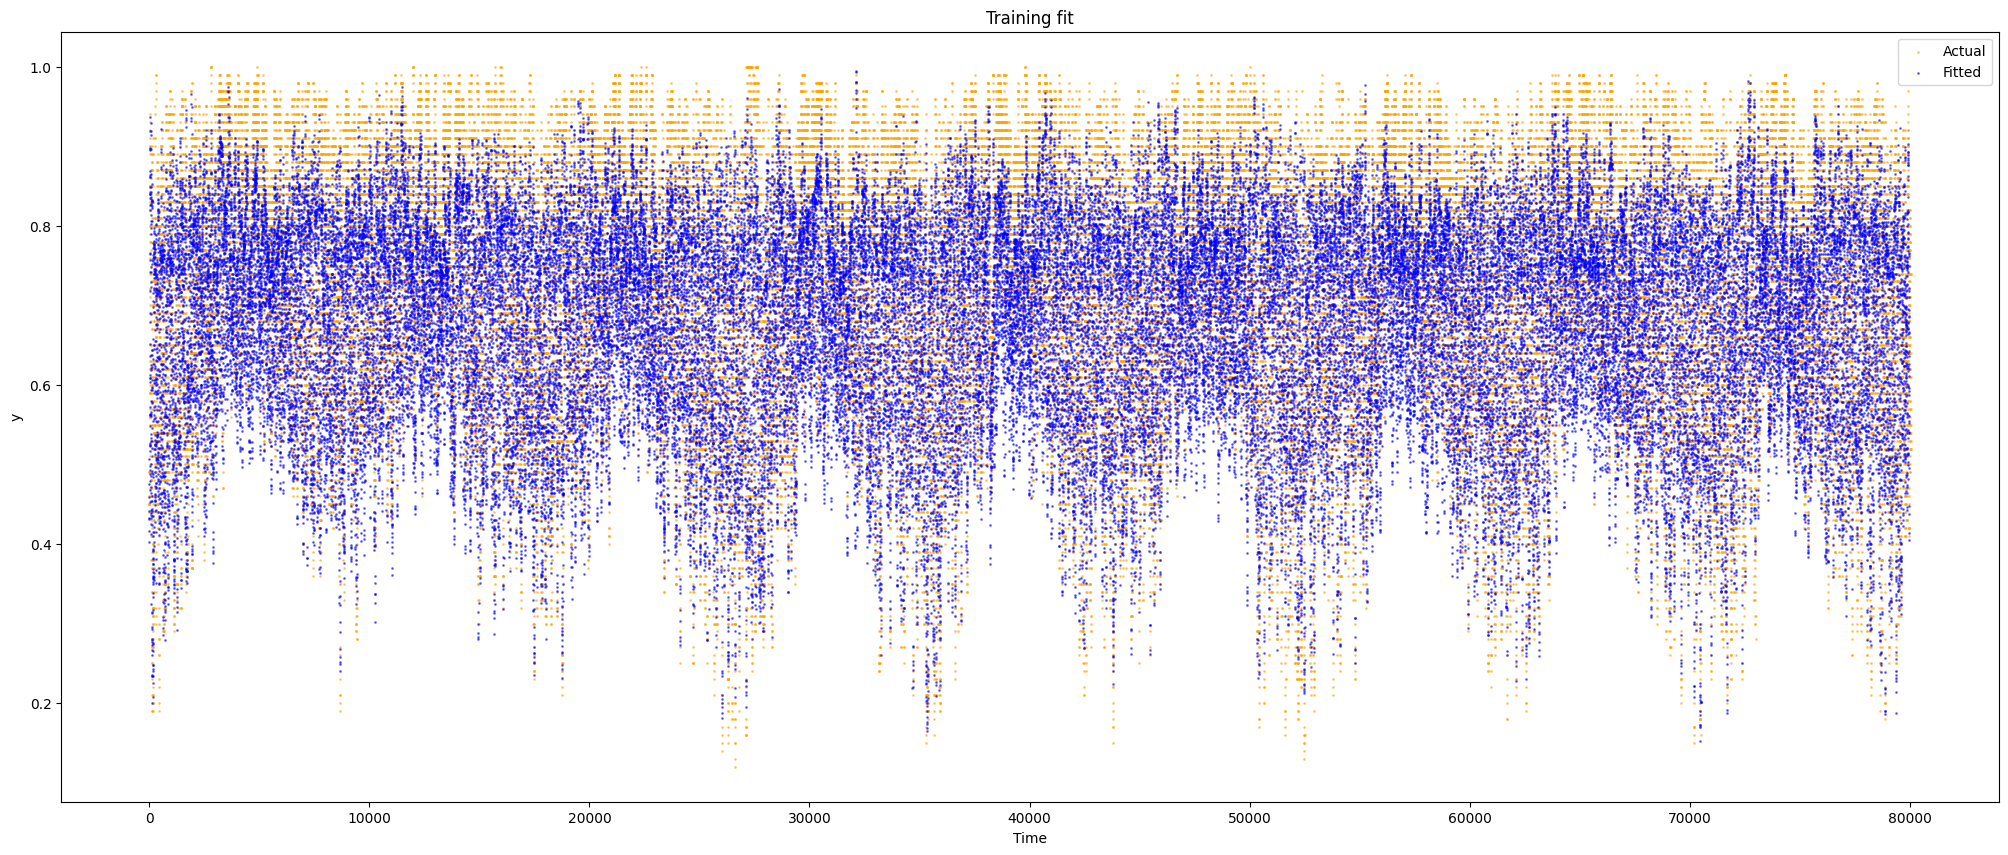

In [ ]:
plt.figure(figsize=(25, 10))
plt.scatter(range(len(y_train)), y_train, label="Actual", color="orange", alpha=0.5, s=1)
plt.scatter(range(len(fitted_train)), fitted_train, label="Fitted", color="blue", alpha=0.5, s=1)
plt.title("Training fit")
plt.xlabel("Time")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
fitted_val = model.predict(dataset_val)

311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


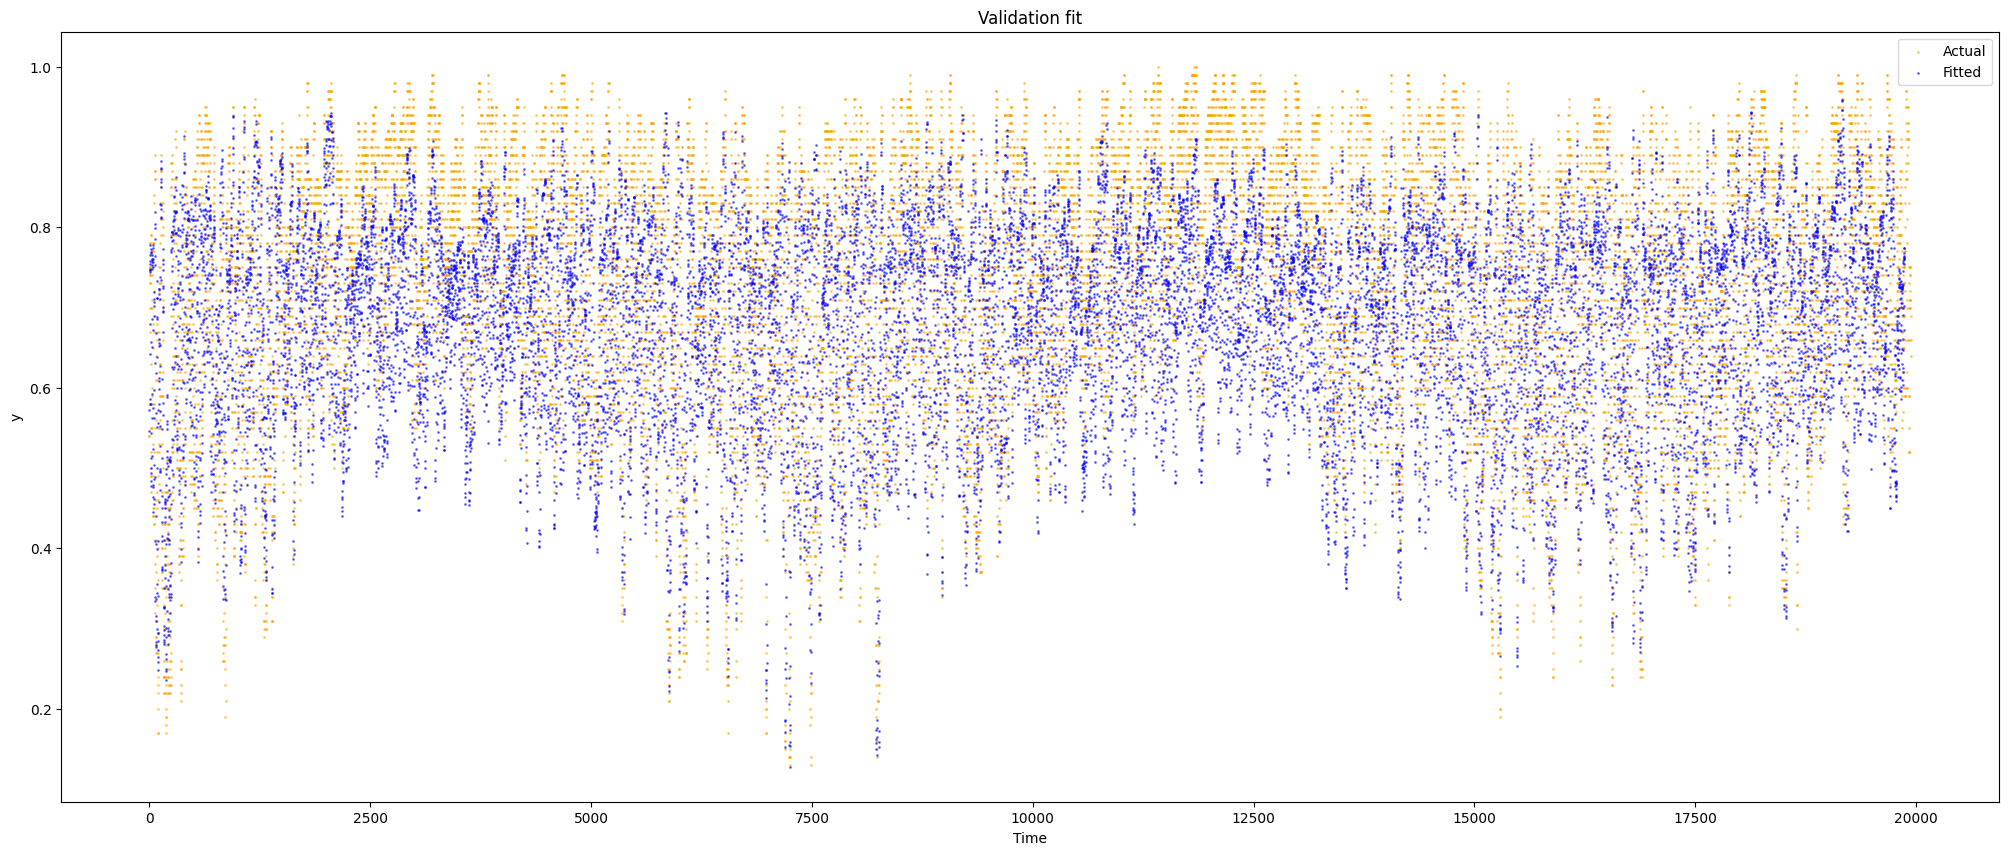

In [ ]:
plt.figure(figsize=(25, 10))
plt.scatter(range(len(y_val)), y_val, label="Actual", color="orange", alpha=0.5, s=1)
plt.scatter(range(len(fitted_val)), fitted_val, label="Fitted", color="blue", alpha=0.5, s=1)
plt.title("Validation fit")
plt.xlabel("Time")
plt.ylabel("y")
plt.legend()
plt.show()